<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [15]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 1: Become familiar with the dataset

In [9]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [8]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

# Task 2: Generate Descriptive Statistics and Visualizations

## For the "Median value of owner-occupied homes" provide a boxplot



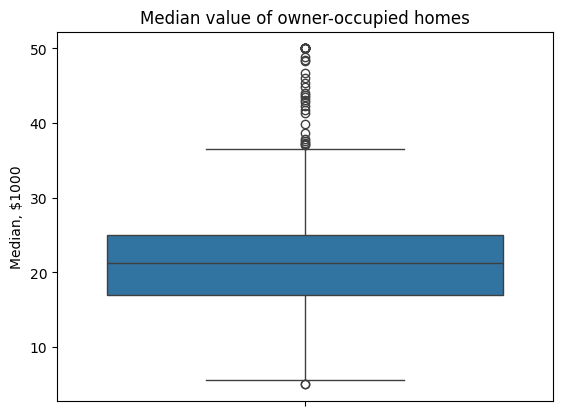

In [25]:
sns.boxplot(boston_df["MEDV"])
plt.title("Median value of owner-occupied homes")
plt.ylabel("Median, $1000")
plt.show()

The median of the median value of owner-occupied homes is about 21k, the 25th percentile is at 17k, 75th percentile is at 26k. Seems like there's one outlier at the lower end at around 5k, and a bunch of outliers around 37k~50k. The data seems to have a small spread at around the median given the box size being small, and the median seems to be in the middle of the box meaning the data is symmetric.

## Provide a  bar plot for the Charles river variable


CHAS
0.0    471
1.0     35
Name: count, dtype: int64


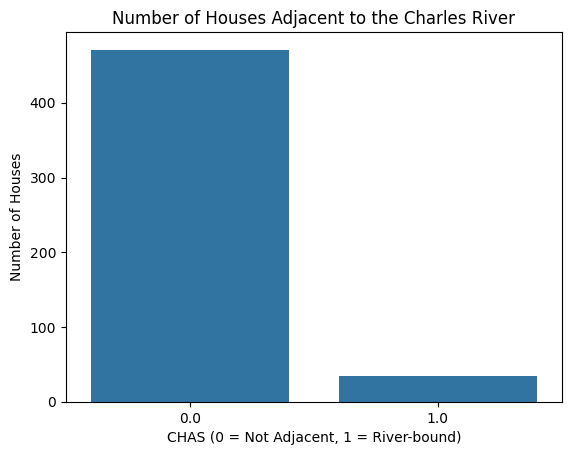

In [27]:
CHAS_count = boston_df['CHAS'].value_counts()
print(CHAS_count)
sns.barplot(x = CHAS_count.index, y = CHAS_count.values)
plt.title("Number of Houses Adjacent to the Charles River")
plt.xlabel("CHAS (0 = Not Adjacent, 1 = River-bound)")
plt.ylabel("Number of Houses")
plt.show()

There're only 35 houses adjacent to the Charles River, 471 not adjacent.

## Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)


In [30]:
def categorize_age(age):
    if age <= 35:
        return "35 and younger"
    elif 35 < age <= 70:
        return "Between 35 and 70"
    else:
        return "70 and older"

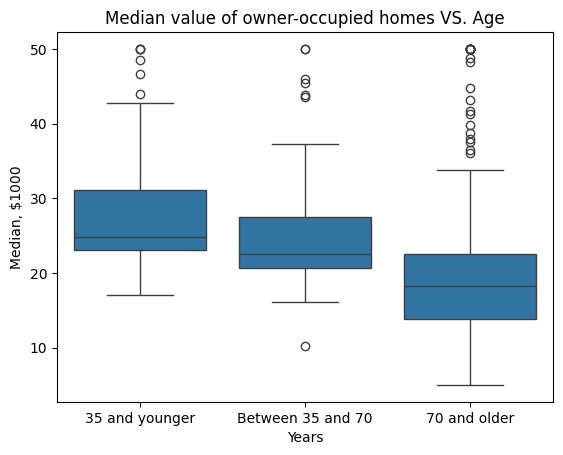

In [32]:
boston_df["age_group"] = boston_df["AGE"].apply(categorize_age)
age_order = ["35 and younger", "Between 35 and 70", "70 and older"]
sns.boxplot(x = boston_df["age_group"], y = boston_df["MEDV"], order = age_order)
plt.title("Median value of owner-occupied homes VS. Age")
plt.ylabel("Median, $1000")
plt.xlabel("Years")
plt.show()

Not sure how to interpret this as the AGE column means the "proportion of owner-occupied units built prior to 1940", the unit should be in percentage but the exercise interprets it in years. The median home value decreases as the age group increase.

## Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?



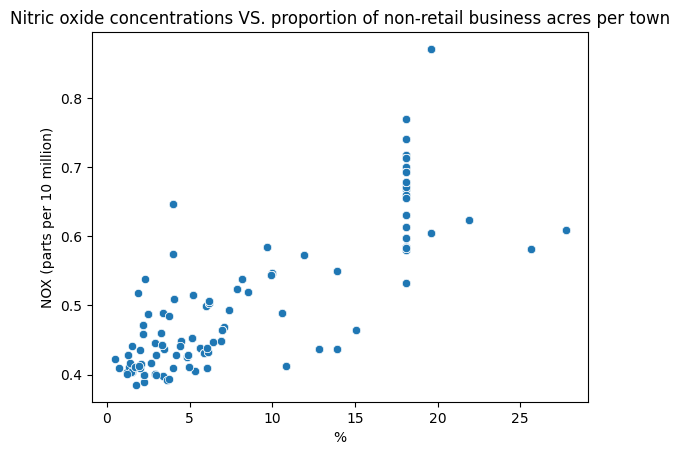

In [34]:
sns.scatterplot(x = boston_df["INDUS"], y = boston_df["NOX"])
plt.title("Nitric oxide concentrations VS. proportion of non-retail business acres per town")
plt.ylabel("NOX (parts per 10 million)")
plt.xlabel("%")
plt.show()

There seems to be a positive correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town, the concentration increases as the proportion of non-retail business increases.

## Create a histogram for the pupil to teacher ratio variable


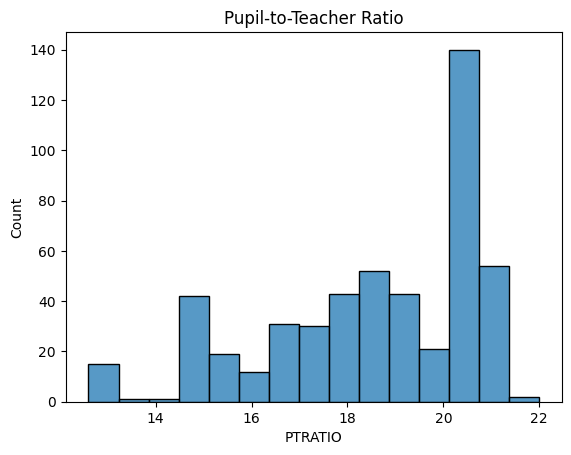

In [39]:
sns.histplot(boston_df["PTRATIO"], bins=15)
plt.title("Pupil-to-Teacher Ratio")
plt.show()

The Pupil-to-teacher ratio seems to be a little bit left skewed, meaning there're more occurences of bigger ratios, the most frequent values lies around 20-21.

# Task 3: Use the appropriate tests to answer the questions provided.


Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

## Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)




H0: there is no difference in median value of houses bounded by the Charles river, MEDV_1 == MEDV_0

H1: there is a difference in median value of houses bounded by the Charles river, MEDV_1 != MEDV_0

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

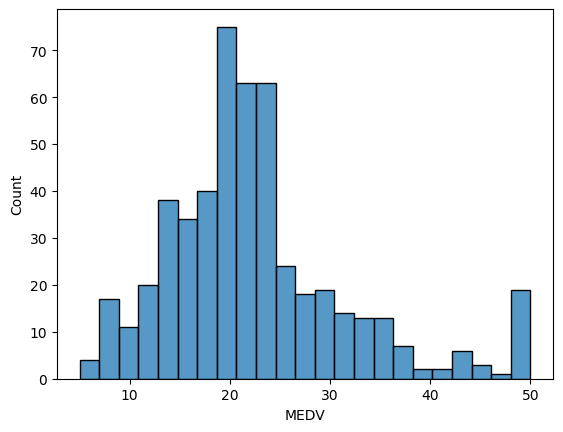

In [40]:
sns.histplot(boston_df["MEDV"])

In [43]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [44]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = False)

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

First we assume the distribution is approximately normal and test for equality of variance using the levene test, the pvalue is 0.0032 which is less than 0.05, prompting us to reject the equal variance assumption. Therefore we state that in the t test, which gives us a pvalue of 0.0036. Given our hypothesis, this is a two-tailed test, so we use a alpha value of 0.05/2 = 0.025, which is greater than our pvalue, so we reject our null hypothesis. There is a significant difference in median value of houses bounded by the Charles River.

## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)



H0: there is no difference in median value of houses for each proportion of owner occupied units built prior to 1940

H1: there is a difference in median value of houses for each proportion of owner occupied units built prior to 1940

In [45]:
scipy.stats.levene(boston_df[boston_df['age_group'] == "35 and younger"]['MEDV'],
                   boston_df[boston_df['age_group'] == "Between 35 and 70"]['MEDV'],
                   boston_df[boston_df['age_group'] == "70 and older"]['MEDV'], center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [48]:
scipy.stats.f_oneway(boston_df[boston_df['age_group'] == "35 and younger"]['MEDV'],
                   boston_df[boston_df['age_group'] == "Between 35 and 70"]['MEDV'],
                   boston_df[boston_df['age_group'] == "70 and older"]['MEDV'])

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

pvalue is smaller than 0.05, we reject H0, there is a difference in median value of houses among the 3 groups in AGE.

## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)



H0: there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

H1: there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

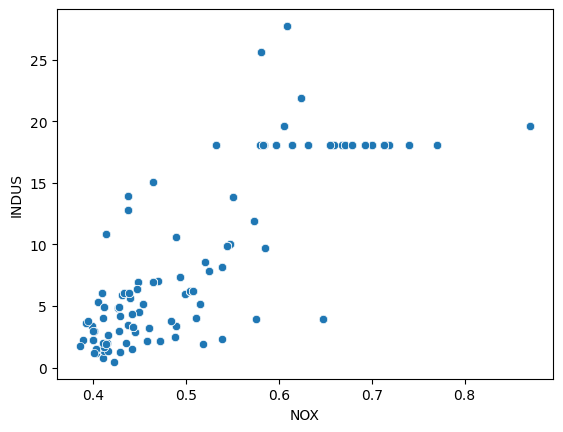

In [51]:
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)

In [52]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

From the scatterplot it seems to have a positive relationship, we can confirm by the pvalue of 7.91e-98, which is smaller than 0.05, so we can reject H0.

## What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)


In [53]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 25 Jan 2025   Prob (F-statistic):           1.21e-08
Time:                        18:52:32   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared is 0.062, meaning the correlation coefficient is 0.24, a small positive correlation. The constant coefficient is 18.3901, meaning the median value of owner occupied homes is 18.3901k when DIS is 0, and every additional weighted distance will introduce a 1.0916k to the median value of owner occupied homes